### 과제1 : 관심있는 주제와 이유
저는 종속 변수가 제시되어있는 지도 학습보다는 종속 변수가 제시되지 않고, 스스로 EDA를 하면서 변수들의 특성을 파악하여 무언가 의미있는 것을 발견하는 비지도 학습에 더 흥미가 있습니다.
따라서 kaggle에서 데이터를 찾을 때에도 clustering이 유의미하게 될 수 있을 것 같은 데이터와 혹은 dimension reduction이 유의미하게 될 수 있을 것 같은 데이터들을 중점적으로 찾아보았습니다.

그래서 찾은 데이터는 쇼핑 데이터 입니다. 해당 데이터의 변수는 성별, 지역, 계절, 아이템 구매 목록 등 어떠한 기준을 세워서 분석을 하기에 용이하다고 생각했습니다.
기계학습을 통해 남성별, 여성별로도 쇼핑의 트렌드를 확인할 수 있고 혹은 다른 기준으로도 기계학습을 보다 용이하게 알아볼 수 있다고 생각했습니다.
#### 데이터 링크
https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset

### 과제2 : 따릉이 데이터 EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'

In [2]:
%pwd

'C:\\Users\\정호원\\OneDrive\\바탕 화면\\baf\\과제'

In [3]:
data = pd.read_csv('C:/Users/정호원/OneDrive/바탕 화면/baf/과제/SeoulBikeData.csv',encoding ='cp949')
# 데이터가 원활하게 불러와지지 않아 encoding ='cp949' 코드 추가함
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.info() # NA값은 없음을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(캜)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(캜)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
data.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
data.isna().sum(axis=0).sort_values() # NA값은 없음을 다시 한 번 확인할 수 있음

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(캜)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(캜)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [7]:
data[data.duplicated()] # 중복행 확인 결과 중복행은 없음

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [8]:
bicycle = data.copy() # 원본 보존하면서 다른 객체 복사

#### 기술통계량으로 나오는 것들만 correlation 구해보기
#### Date, Seasons, Holiday, Functioning Day는 drop

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'correlation heatmap')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


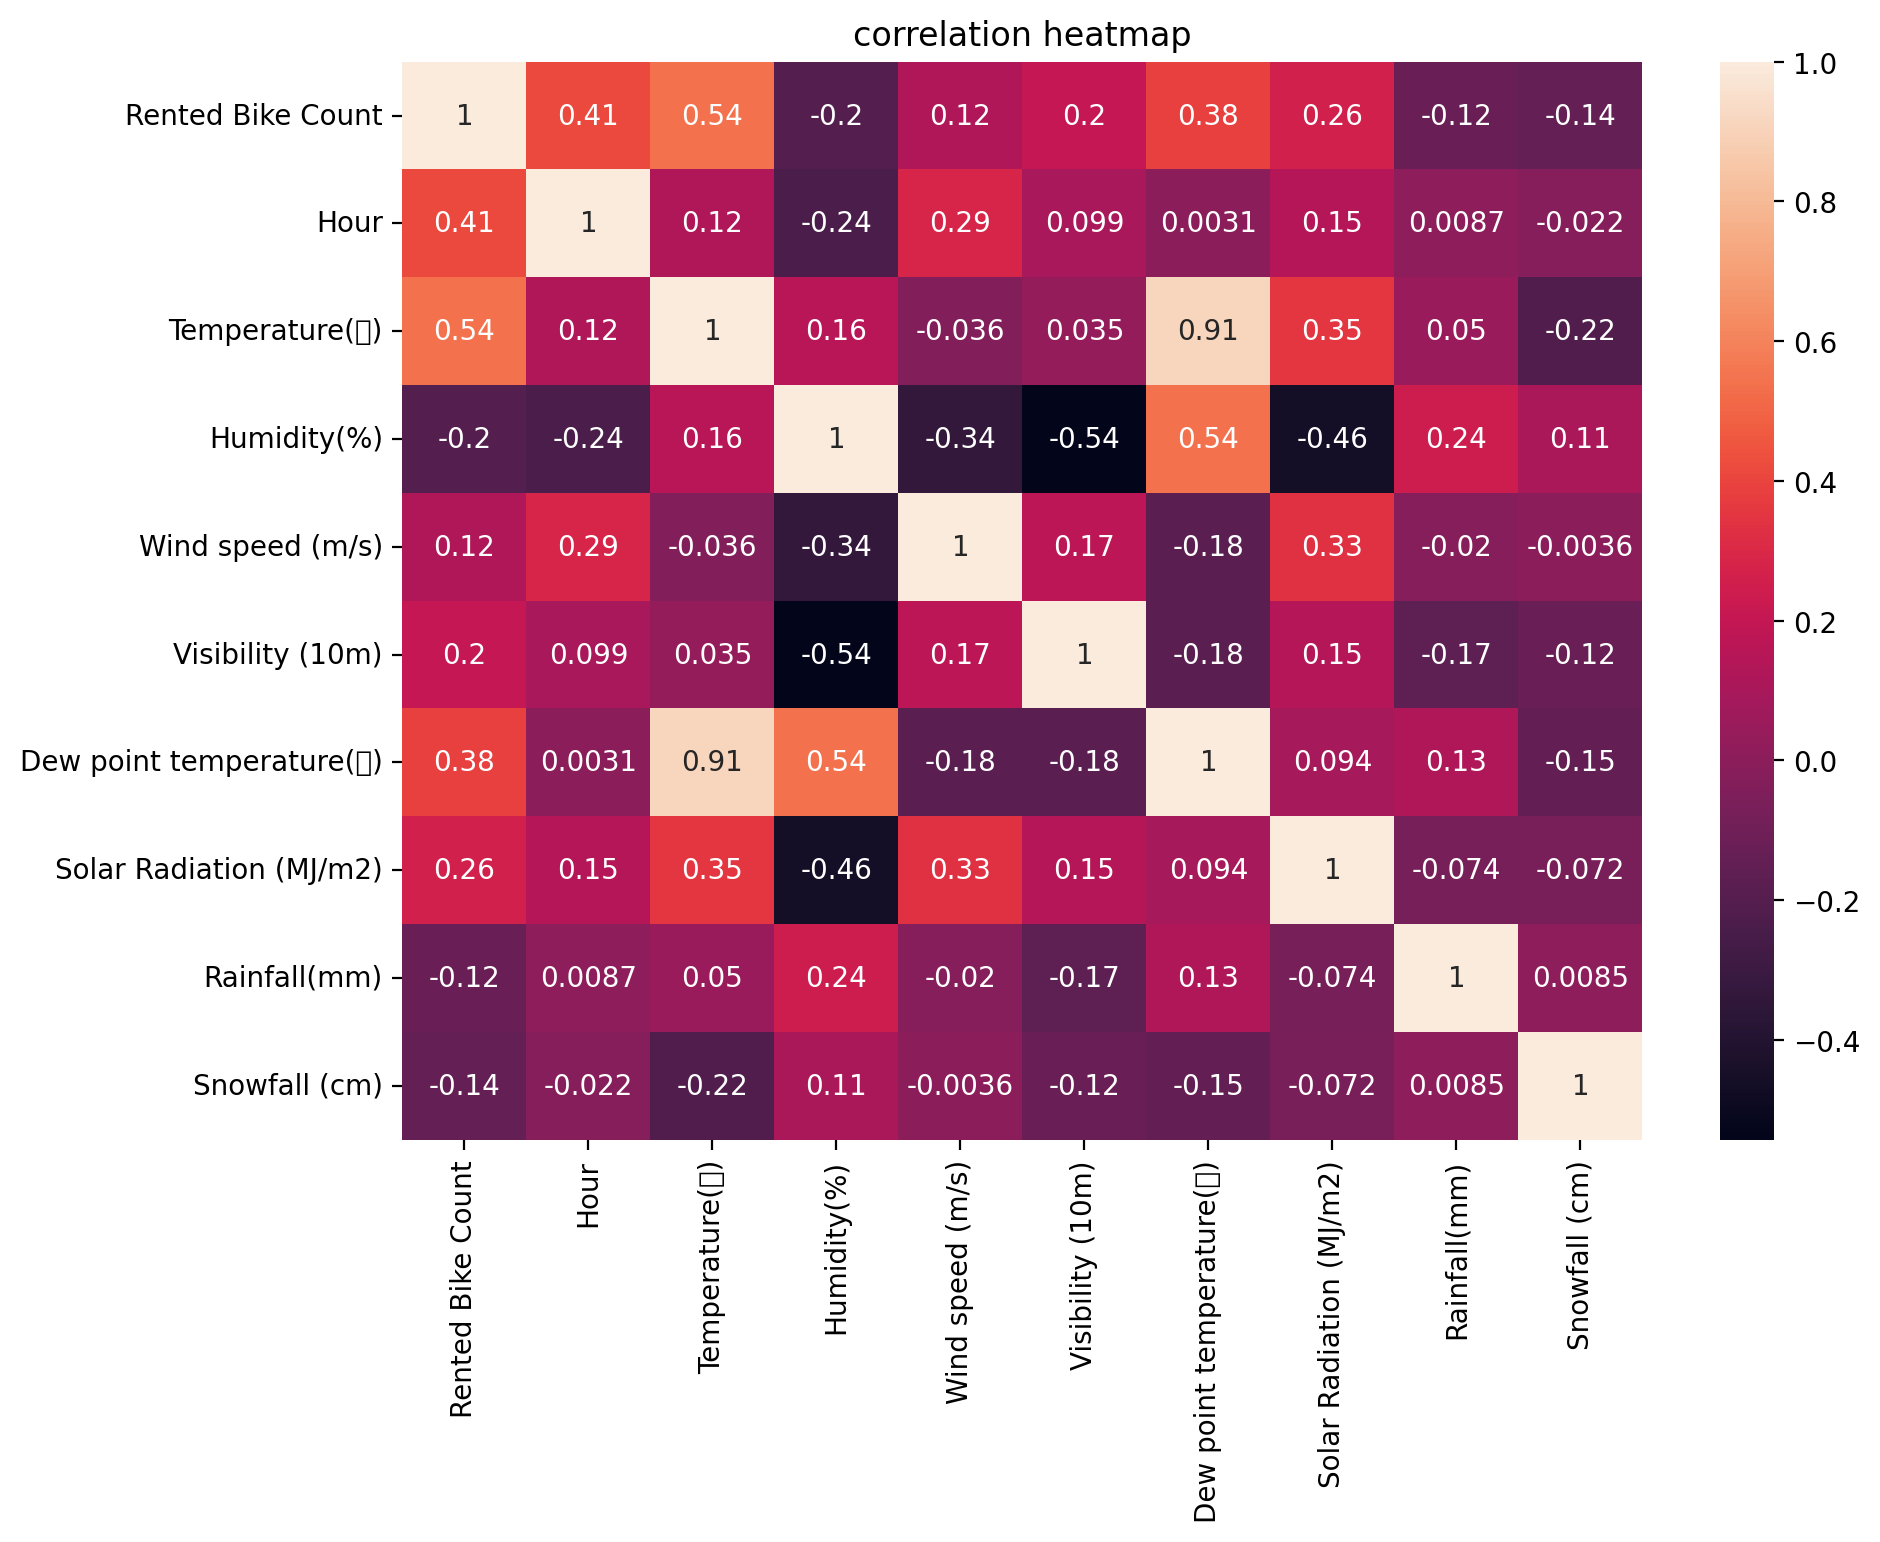

In [9]:
bicycle_corr = bicycle.drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
bicycle_corr.corr()
plt.figure(figsize=(10,7)) # 사이즈
sns.heatmap(bicycle_corr.corr(),annot=True)
plt.title('correlation heatmap') # correlation 히트맵

#### bicycle에서 탔냐 안 탔냐가 제일 중요하기에, Functioning Day를 기준으로 value를 파악함

In [10]:
bicycle['Functioning Day'].value_counts() 

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [11]:
bicycle['Functioning Day'].value_counts().values

array([8465,  295], dtype=int64)

###### Functioning Day가 No인 것 중에서  Rented Bike Count가 0보다 큰 것이 있는지 파악함

In [12]:
condition1 = (bicycle['Functioning Day'] == 'No') & (bicycle['Rented Bike Count'] > 0)
result1 = bicycle[condition1]
result1 # Empty 임을 알 수 있음

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


###### Functioning Day가 Yes인 것 중에서  Rented Bike Count가 0인 것이 있는지 파악함

In [13]:
condition2 = (bicycle['Functioning Day'] == 'Yes') & (bicycle['Rented Bike Count'] == 0)
result2 = bicycle[condition2]
result2 # Empty 임을 알 수 있음

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


####  Functioning Day가 Yes인 것과 No인 것을 나눠서 진행함

###### Functioning Day가 Yes인 것

In [14]:
bicycle_1 = bicycle[bicycle['Functioning Day'] == 'Yes']
bicycle_2 = bicycle[bicycle['Functioning Day'] == 'No']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'correlation heatmap')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


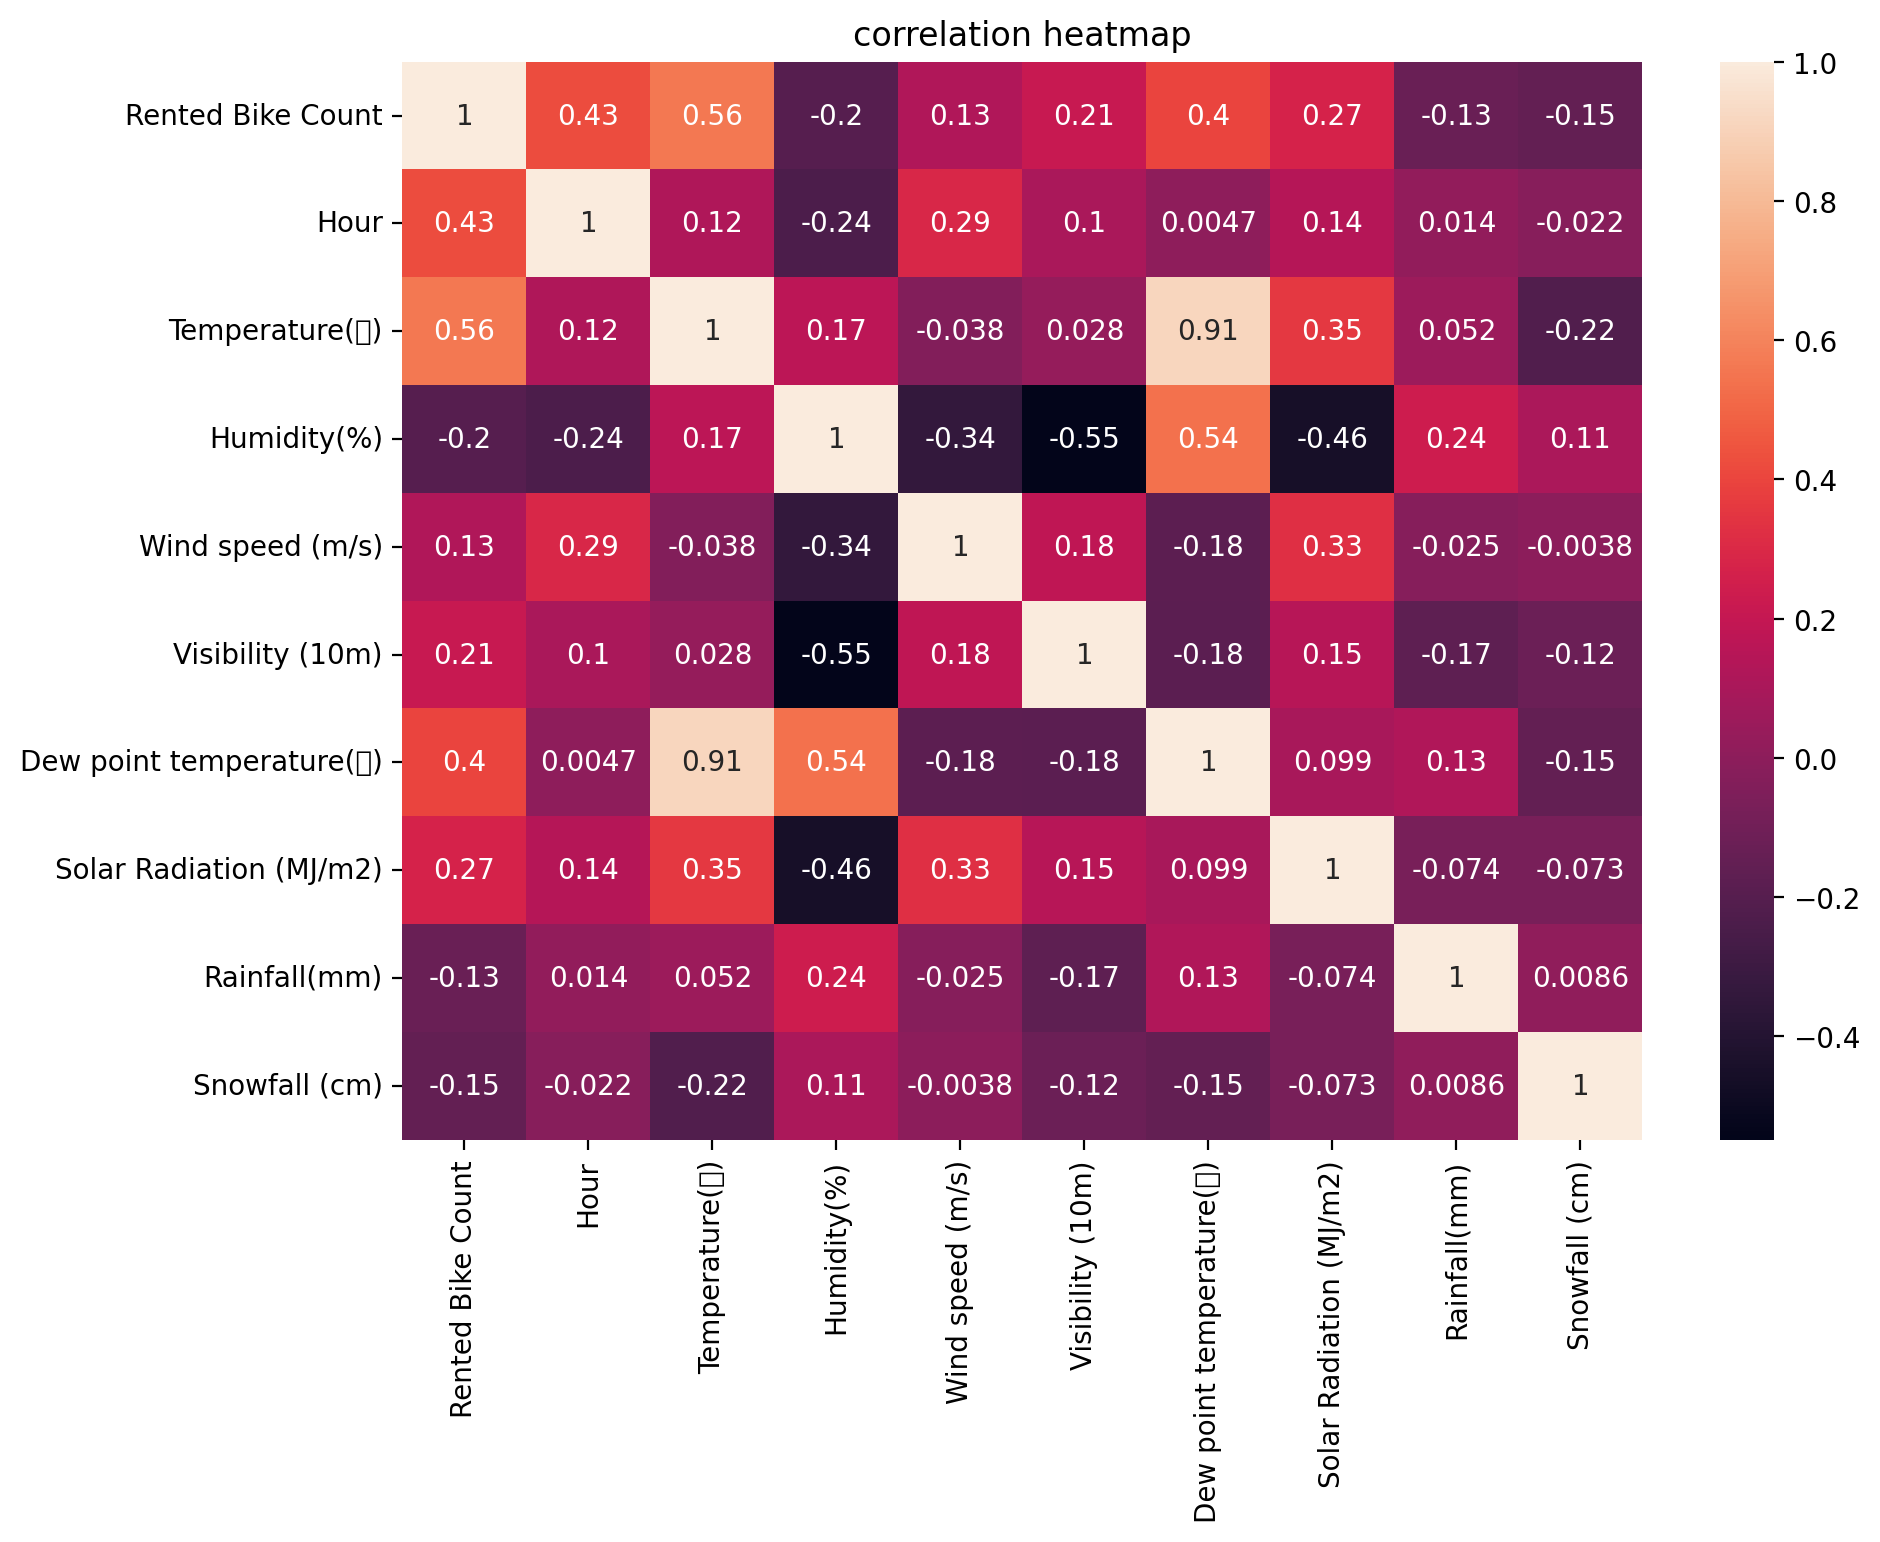

In [15]:
# 문자형은 날리기
bicycle_1 = bicycle_1.drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
bicycle_1.corr()
plt.figure(figsize=(10,7)) # 사이즈
sns.heatmap(bicycle_1.corr(),annot=True)
plt.title('correlation heatmap') # correlation 히트맵

#### 따릉이 대여량과 유의미한 상관관계를 가지는 Hour와 temperature 과의 관계파악 진행

##### 대여량 - 시간

In [16]:
# 대여량 - 시간
bicycle_hour = bicycle_1.copy()
bicycle_hour[['Hour']]

,Hour
0,0
1,1
2,2
3,3
4,4
...,...
8755,19
8756,20
8757,21
8758,22


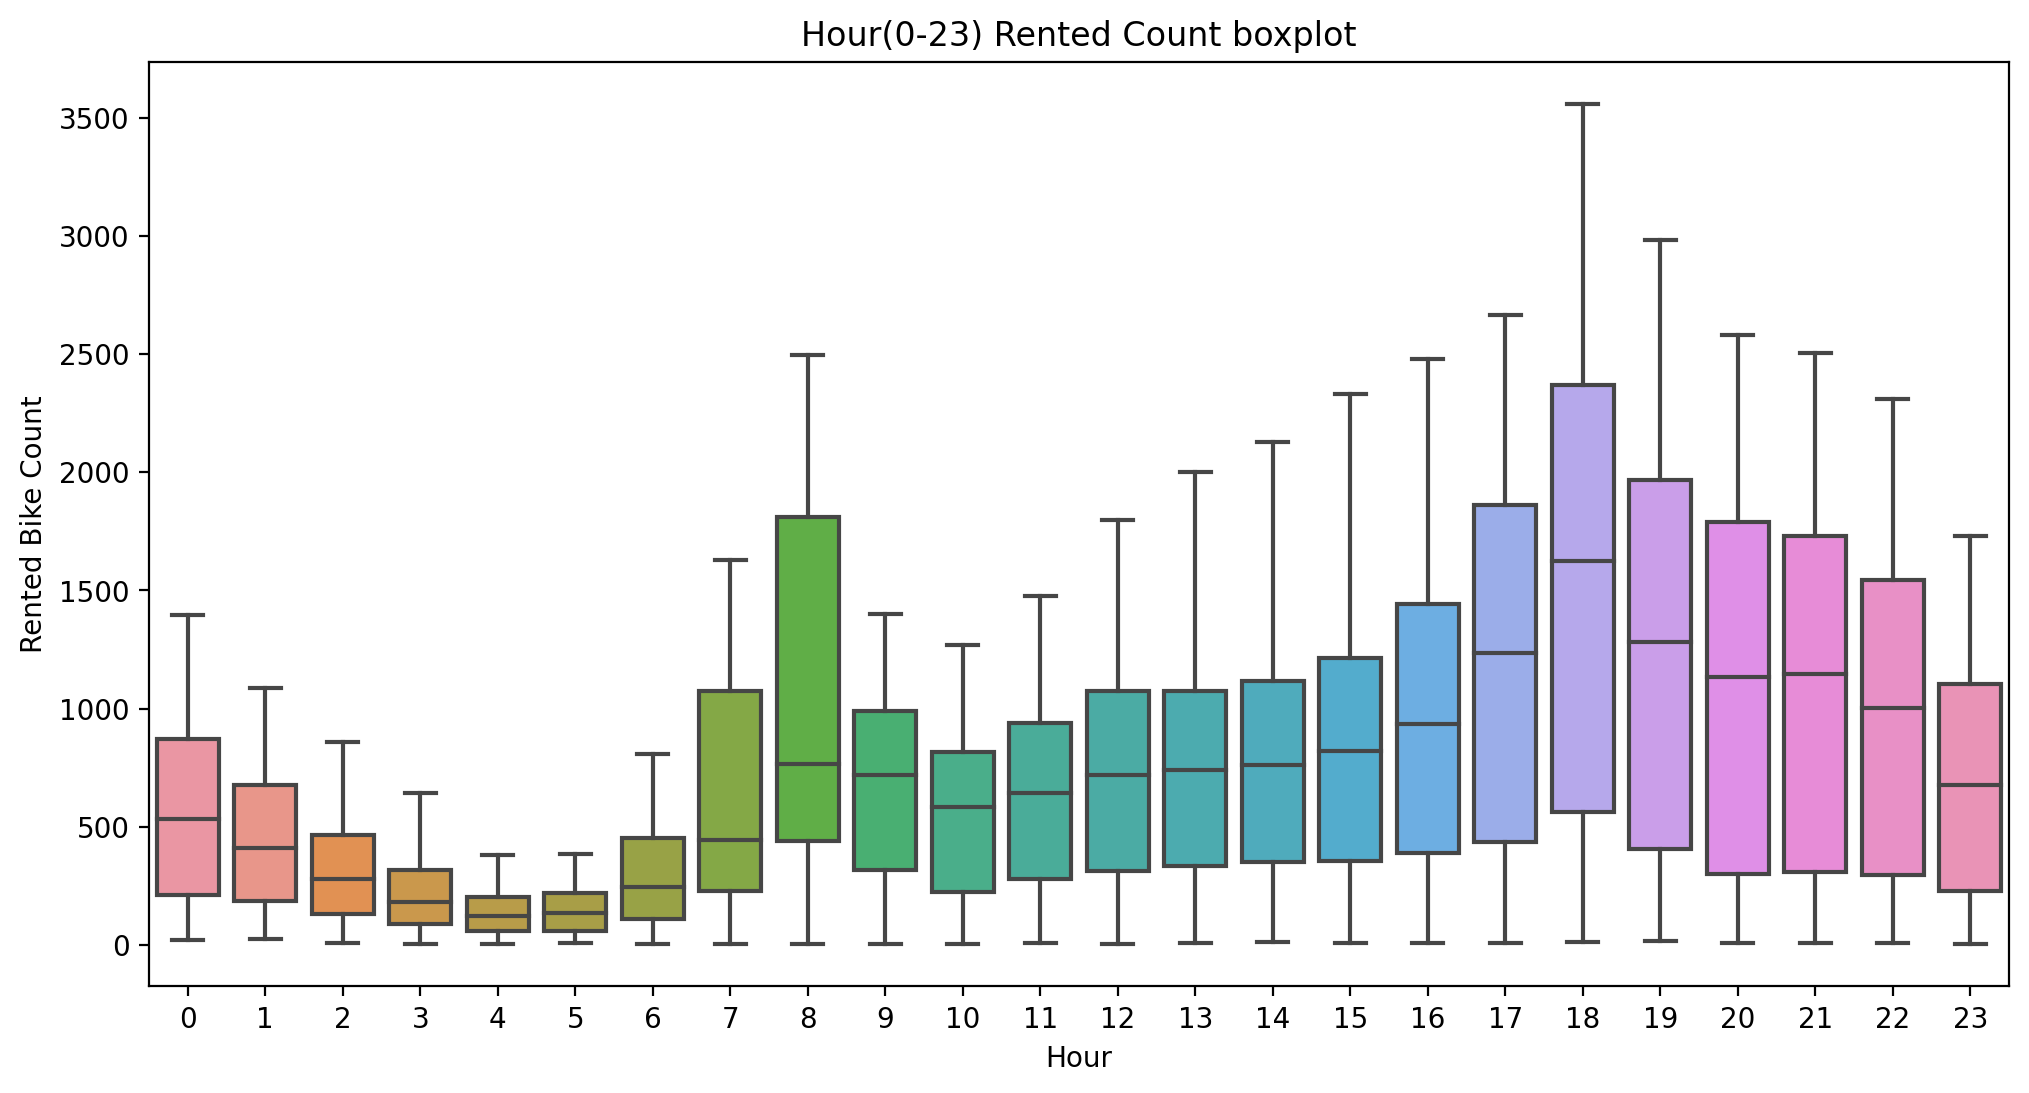

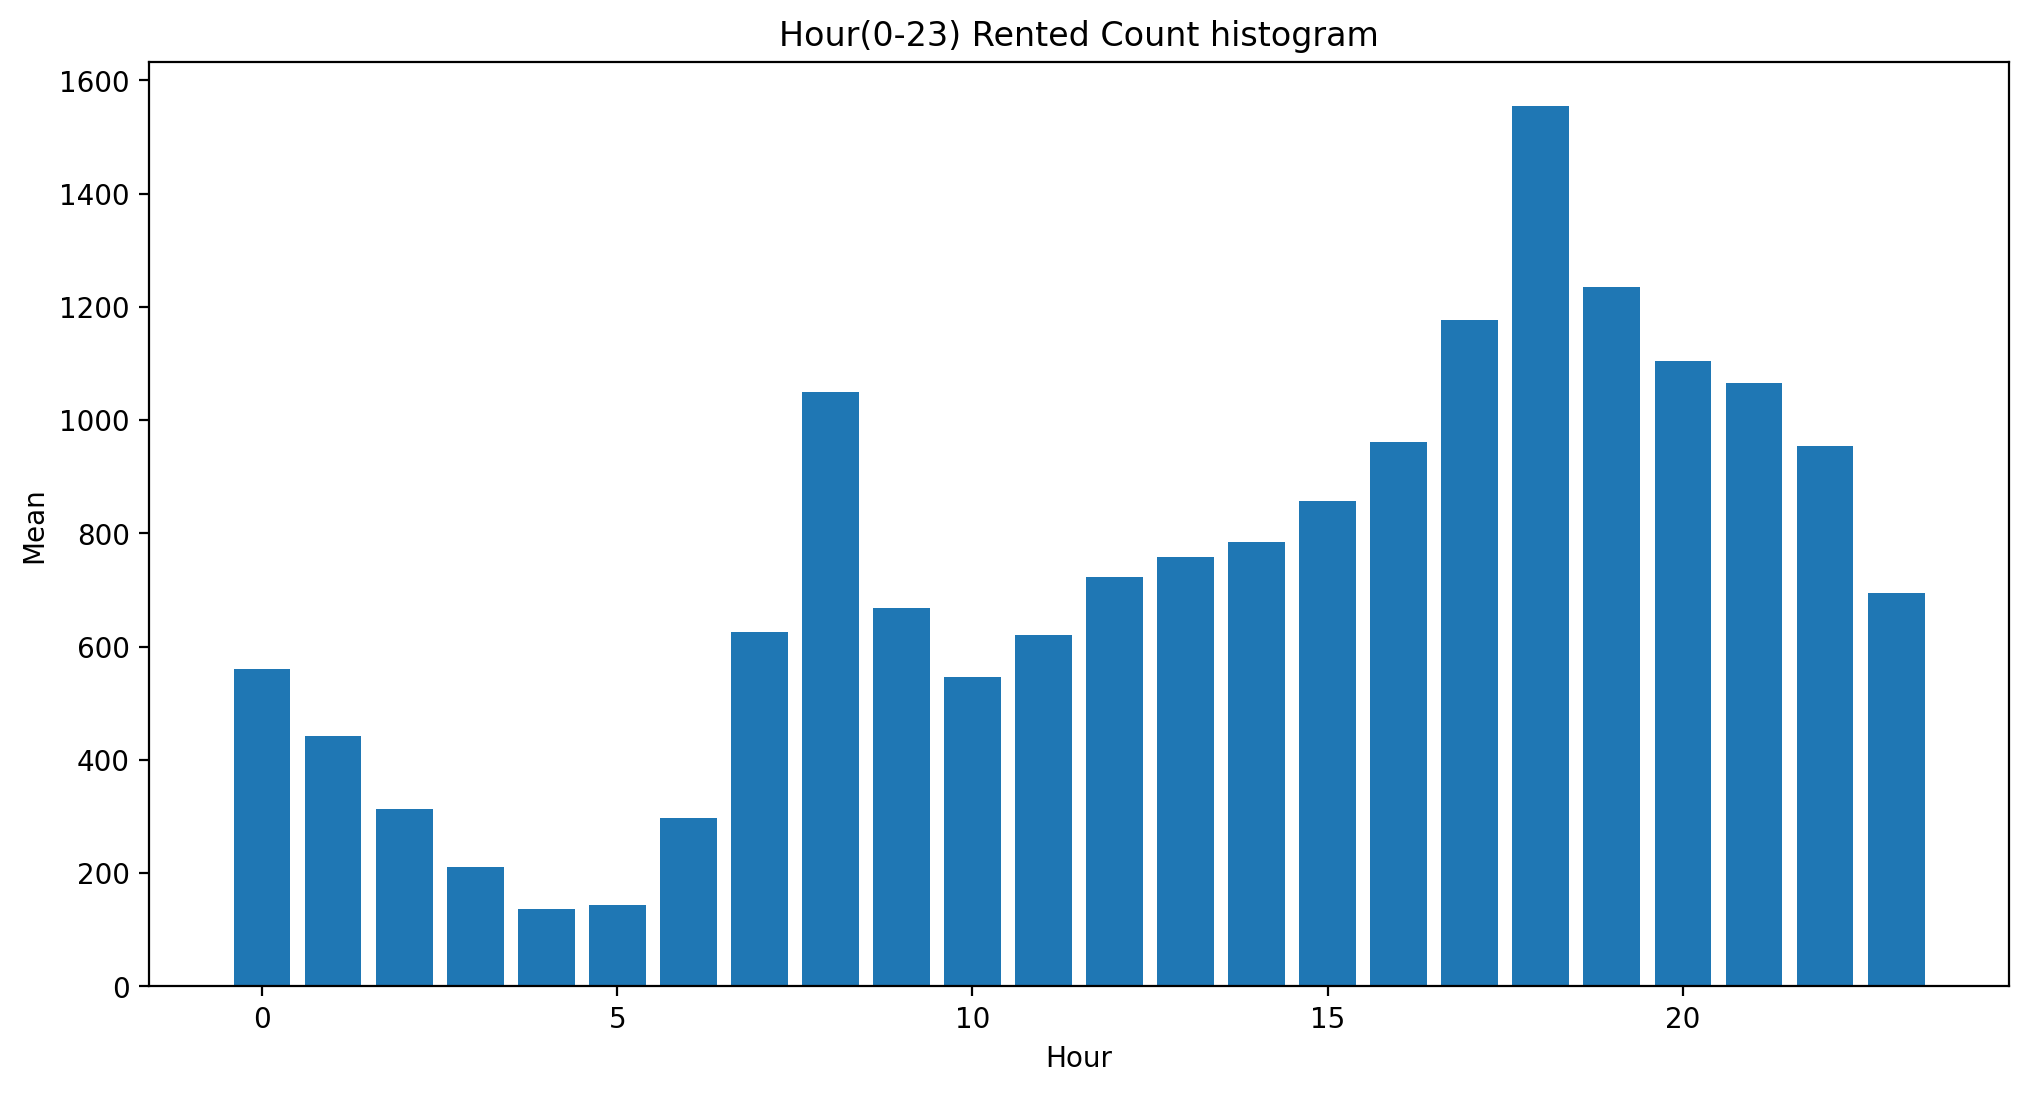

In [17]:
bicycle_hour_df = pd.DataFrame(bicycle_hour)

# 시간대별 대여량에 대한 boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Rented Bike Count', data=bicycle_hour_df, showfliers=False)
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Hour(0-23) Rented Count boxplot')
plt.show()

# 시간대별 대여량에 대해서 평균을 계산함
means = [bicycle_hour_df[bicycle_hour_df['Hour'] == i]['Rented Bike Count'].mean() for i in range(24)]

# 시간대별 대여량을 평균낸 결과를 바탕으로 한 Histogram
plt.figure(figsize=(12, 6))
plt.bar(range(24), means)
plt.xlabel('Hour')
plt.ylabel('Mean')
plt.title('Hour(0-23) Rented Count histogram')
plt.show()

boxplot과 히스토그램을 통해서 알 수 있듯이 출퇴근 시간과 오후 시간 대에 대여량이 많음을 알 수 있음

##### 대여량 - 온도


In [18]:
# 대여량 - 온도
bicycle_temp = bicycle_1.copy()
bicycle_temp[['Temperature(캜)']]

,Temperature(캜)
0,-5.2
1,-5.5
2,-6.0
3,-6.2
4,-6.0
...,...
8755,4.2
8756,3.4
8757,2.6
8758,2.1


In [19]:
bicycle_temp[['Temperature(캜)']].describe() # min : -17.800000, max : 39.400000 

,Temperature(캜)
count,8465.000000
mean,12.771057
std,12.104375
min,-17.800000
25%,3.000000
50%,13.500000
75%,22.700000
max,39.400000


In [20]:
bicycle_temp[['Temperature(캜)']].info() # not null

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 0 to 8759
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature(캜)  8465 non-null   float64
dtypes: float64(1)
memory usage: 132.3 KB


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


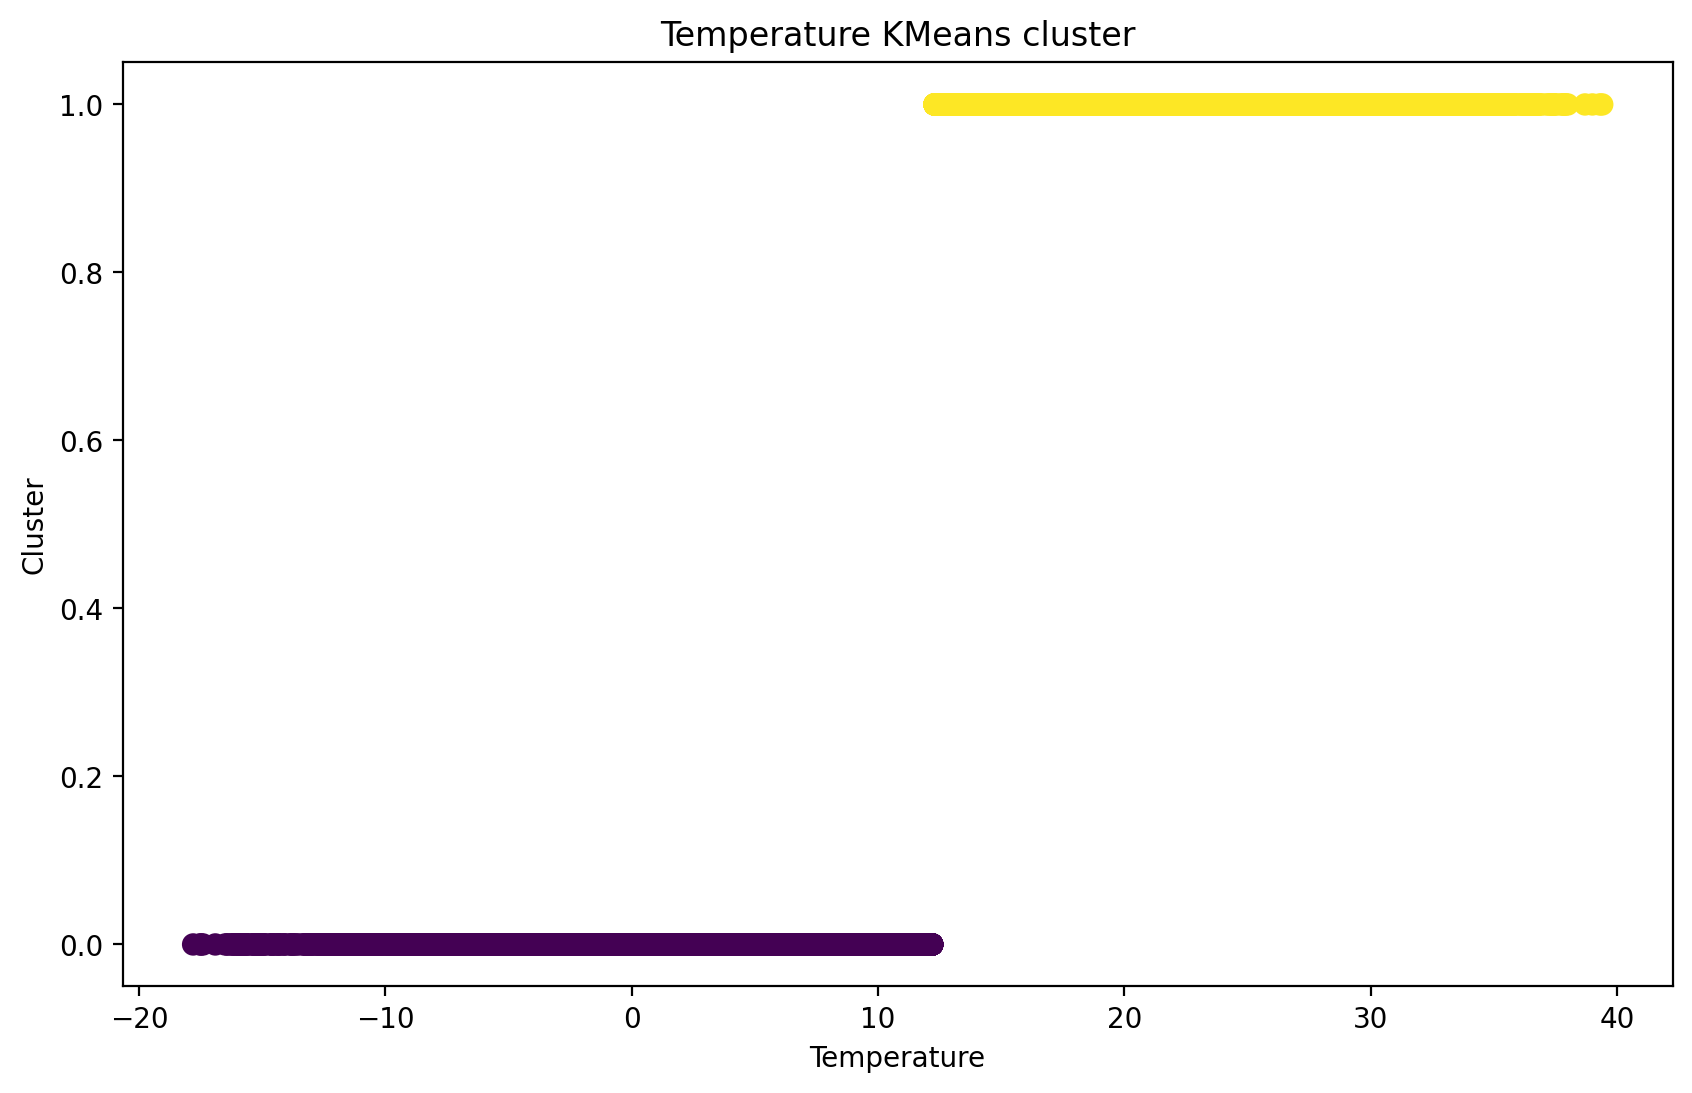

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 데이터프레임에서 온도 변수를 택해서 Kmeans clustering을 진행할 예정

# Kmeans clustering

# n=2
kmeans_n = 2
kmeans = KMeans(n_clusters=kmeans_n, random_state=777) # random state는 임의로 지정 777 
bicycle_temp['Cluster_k2'] = kmeans.fit_predict(bicycle_temp[['Temperature(캜)']])

# silhouette value, n=2
silhouette_k2 = silhouette_score(bicycle_temp[['Temperature(캜)']], bicycle_temp['Cluster_k2'])
silhouette_k2 # 0.6233785759093258

# 시각화를 해보자
plt.figure(figsize=(10, 6))
plt.scatter(bicycle_temp[['Temperature(캜)']], bicycle_temp['Cluster_k2'], c=bicycle_temp['Cluster_k2'], cmap='viridis', s=50)
plt.title('Temperature KMeans cluster')
plt.xlabel('Temperature')
plt.ylabel('Cluster')
plt.show()


#### n=3 # 0.555327868884784
kmeans_n = 3
kmeans = KMeans(n_clusters=kmeans_n, random_state=777) # random state는 임의로 지정 777 
bicycle_temp['Cluster_k3'] = kmeans.fit_predict(bicycle_temp[['Temperature(캜)']])

silhouette value, n=3
silhouette_k3 = silhouette_score(bicycle_temp[['Temperature(캜)']], bicycle_temp['Cluster_k3'])
silhouette_k3 

#### n=4 # 0.5367167328749362
kmeans_n = 4
kmeans = KMeans(n_clusters=kmeans_n, random_state=777) # random state는 임의로 지정 777 
bicycle_temp['Cluster_k4'] = kmeans.fit_predict(bicycle_temp[['Temperature(캜)']])

silhouette value, n=4
silhouette_k4 = silhouette_score(bicycle_temp[['Temperature(캜)']], bicycle_temp['Cluster_k4'])
silhouette_k4

cluster의 기준이 10도 이상 15도 이하에서 끊긴 것을 기준으로 온도와 대여량 사이의 관계 파악

In [22]:
bicycle_temp.head()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Cluster_k2
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0


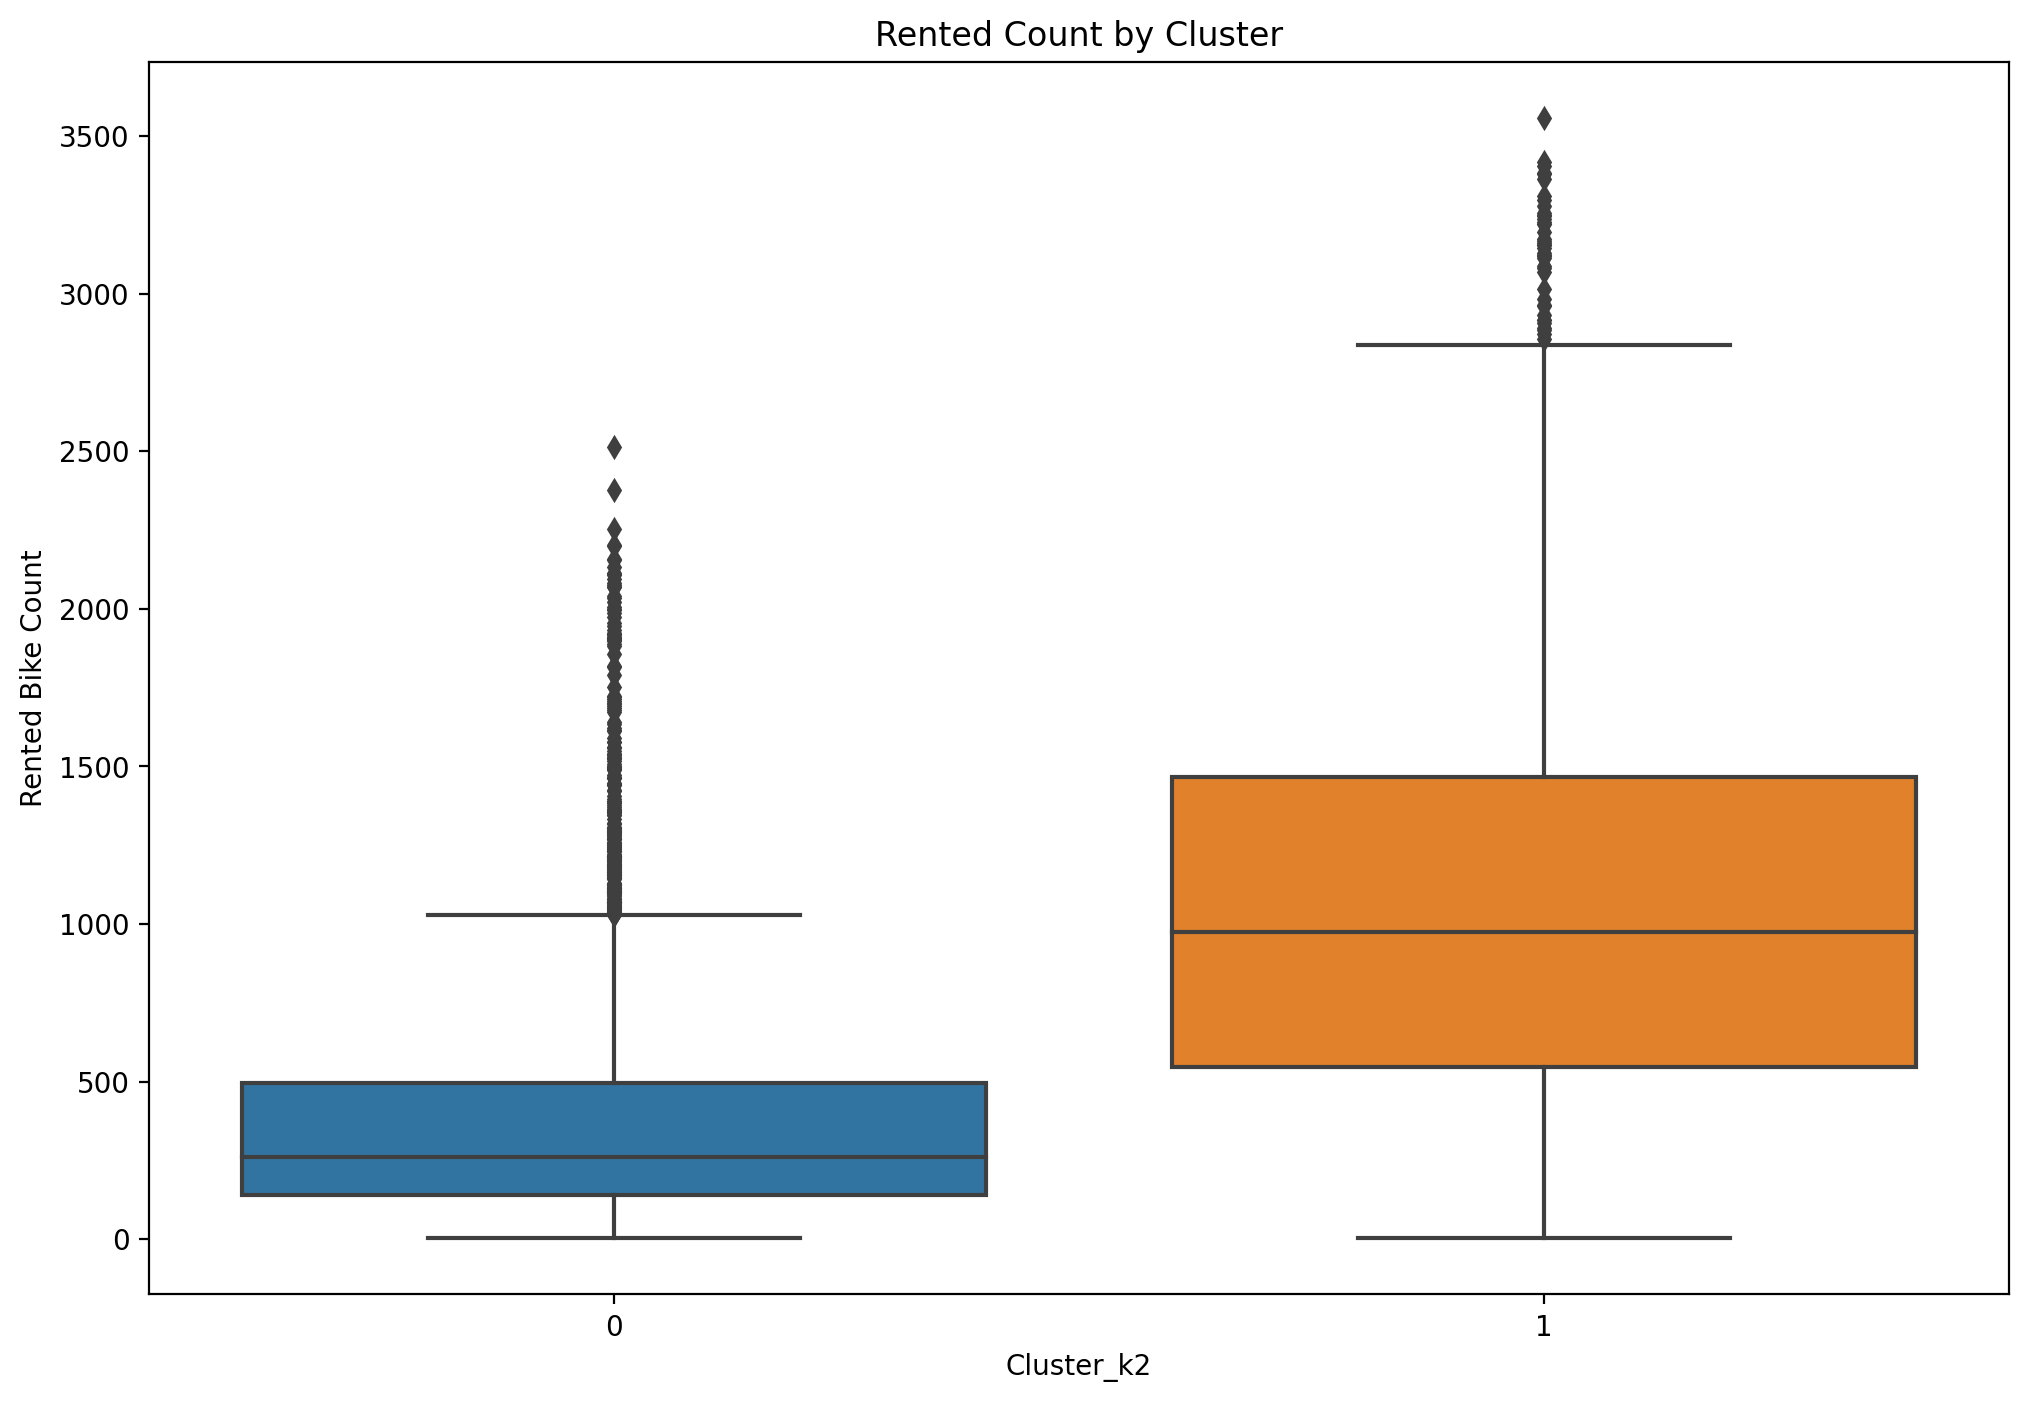

In [23]:
# 클러스터 별로 boxplot 그려보기
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster_k2', y='Rented Bike Count', data=bicycle_temp)
plt.title('Rented Count by Cluster')
plt.show()

기온이 자전거 대여량에 미치는 영향은 다음과 같다.
기온이 10도에서 15도 사이를 기준으로 그 이하라면 자전거 대여량이 적다.
반대로 기온이 그 이상이라면 자전거 대여량이 많다.

###### Functioning Day가 No인 것

In [24]:
bicycle_2.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'correlation heatmap')

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52892 (\N{HANGUL SYLLABLE KAELS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


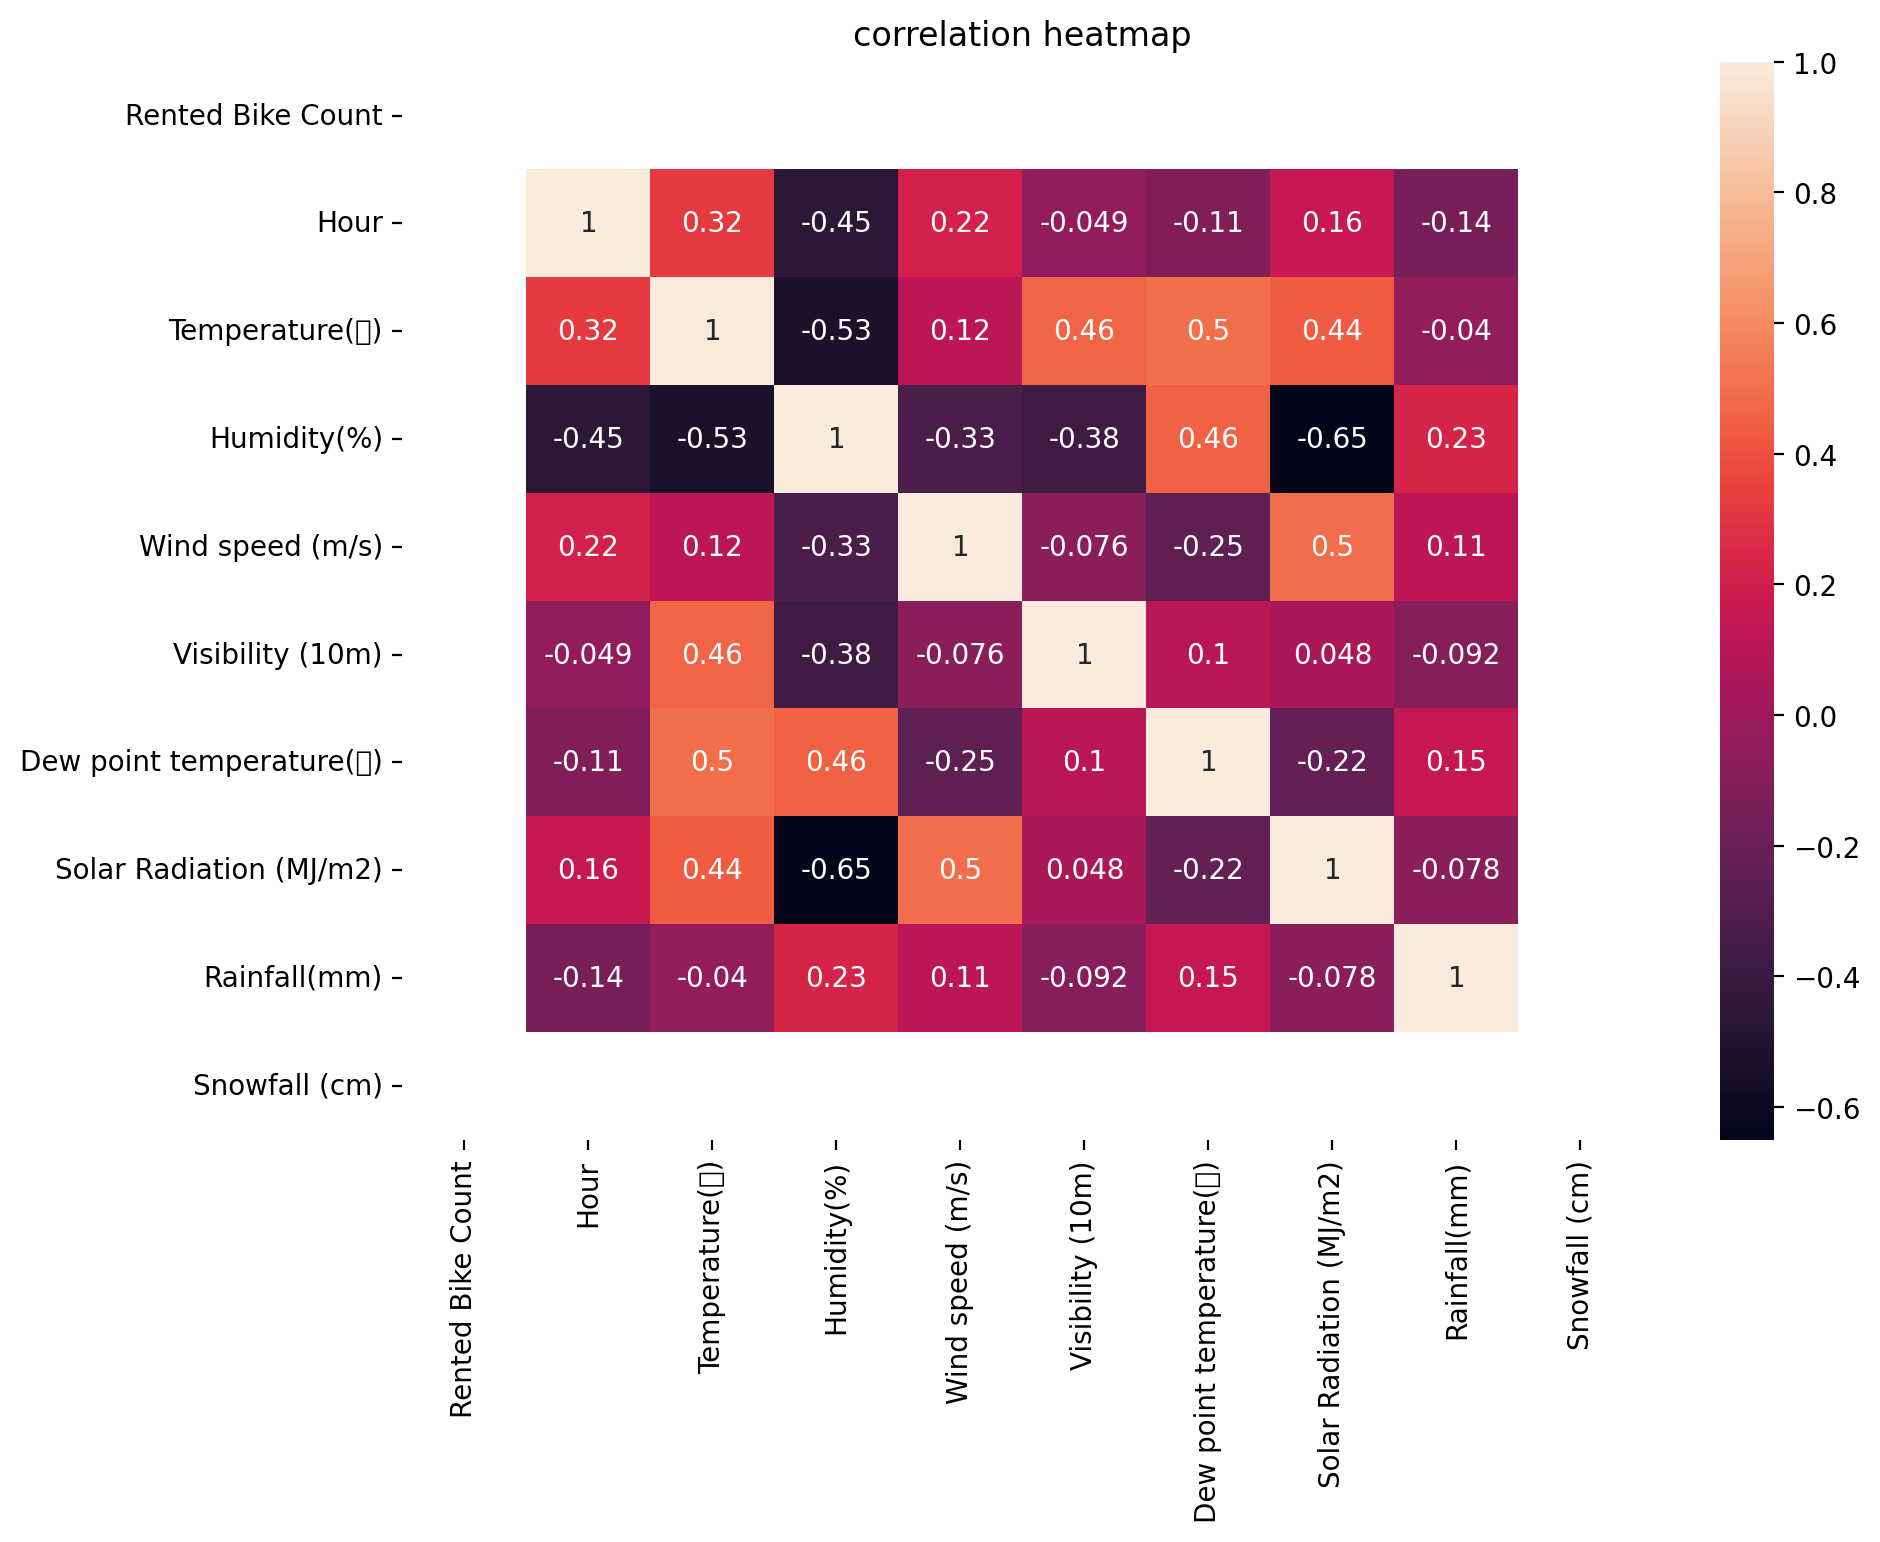

In [25]:
# 문자형은 날리기
bicycle_2 = bicycle_2.drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
bicycle_2.corr()
plt.figure(figsize=(10,7)) # 사이즈
sns.heatmap(bicycle_2.corr(),annot=True)
plt.title('correlation heatmap') # correlation 히트맵

Rented Bike Count가 0이기 때문에 대여량을 가지고 무언가 의미있는 결과를 이끌어내는 것은 한계가 있다.